In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [331]:
loan_train = pd.read_csv('./data/Train/Train.csv', index_col='ID')
loan_test = pd.read_csv('./data/Test/Test.csv', index_col='ID')

In [332]:
loan_train = loan_train[(loan_train.index != 'ID036559D40')&
                        (loan_train.index != 'ID113457T20')]

In [333]:
%run scripts/helper.py
%run scripts/preprocess.py
%run scripts/models.py
%run scripts/metrics.py
%run scripts/ensembling.py

In [334]:
# columns without any missing values
not_nulls = not_null_cols(loan_train)

In [335]:
# columns with type object that don't have any missing values
obj_cols = cols_with_obj_type(loan_train, not_nulls)

In [336]:
loan_train_processed, loan_test_processed = process(loan_train, loan_test, obj_cols)

In [337]:
loan_train_processed.columns

Index([u'Gender', u'City', u'Monthly_Income', u'DOB', u'Lead_Creation_Date',
       u'Loan_Amount_Applied', u'Loan_Tenure_Applied', u'Existing_EMI',
       u'Employer_Name', u'Salary_Account', u'Mobile_Verified', u'Var5',
       u'Var1', u'Loan_Amount_Submitted', u'Loan_Tenure_Submitted',
       u'Interest_Rate', u'Processing_Fee', u'EMI_Loan_Submitted',
       u'Filled_Form', u'Device_Type', u'Var2', u'Source', u'Var4',
       u'LoggedIn', u'Disbursed'],
      dtype='object')

## Exploratory Data Analysis

In [338]:
cities = loan_train_processed.groupby(['City', 'Disbursed']).size().unstack()

In [339]:
cities.sort(columns=1, ascending=False)

Disbursed,0,1
City,,
Delhi,12257,269
Bengaluru,10645,179
Mumbai,10625,169
Pune,5086,121
Hyderabad,7188,84
Chennai,6849,67
Kolkata,2838,50
Gurgaon,1185,27
Jaipur,1307,24


In [340]:
def to_lower_case(c):
    try:
        if math.isnan(c):
            return c
        else:
            return c.lower()
    except:
        return c
    
loan_train_processed['City'] = loan_train_processed.City.map(to_lower_case)
loan_test_processed['City'] = loan_test_processed.City.map(to_lower_case)

In [341]:
# fill missing values with -999 for City
loan_train_processed.City.fillna('-999', inplace=True)
loan_test_processed.City.fillna('-999', inplace=True)

In [342]:
loan_train_processed['Salary_Account'] = loan_train_processed.Salary_Account.map(to_lower_case)
loan_test_processed['Salary_Account'] = loan_test_processed.Salary_Account.map(to_lower_case)

In [343]:
# fill missing values with -999 for City
loan_train_processed.Salary_Account.fillna('-999', inplace=True)
loan_test_processed.Salary_Account.fillna('-999', inplace=True)

In [344]:
loan_train_processed['Employer_Name'] = loan_train_processed.Employer_Name.map(to_lower_case)
loan_test_processed['Employer_Name'] = loan_test_processed.Employer_Name.map(to_lower_case)

In [345]:
# fill missing values with -999 for Employer's name
loan_train_processed.Employer_Name.fillna('-999', inplace=True)
loan_test_processed.Employer_Name.fillna('-999', inplace=True)

## Data preparation and Cleaning

In [346]:
# encode city names in train and test
loan_train_processed, loan_test_processed = process(loan_train_processed, loan_test_processed, ['City', 'Salary_Account', 'Employer_Name'])

In [347]:
# fill missing values for loan_amount_applied and loan_tenure_applied
loan_train_processed.Loan_Amount_Applied.fillna(loan_train_processed.Loan_Amount_Applied.median(), inplace=True)
loan_train_processed.Loan_Tenure_Applied.fillna(loan_train_processed.Loan_Tenure_Applied.median(), inplace=True)

loan_test_processed.Loan_Amount_Applied.fillna(loan_test_processed.Loan_Amount_Applied.median(), inplace=True)
loan_test_processed.Loan_Tenure_Applied.fillna(loan_test_processed.Loan_Tenure_Applied.median(), inplace=True)

In [348]:
# fill missing values for loan_amount_applied and loan_tenure_applied
loan_train_processed.Loan_Amount_Submitted.fillna(loan_train_processed.Loan_Amount_Submitted.median(), inplace=True)
loan_train_processed.Loan_Tenure_Submitted.fillna(loan_train_processed.Loan_Tenure_Submitted.median(), inplace=True)

loan_test_processed.Loan_Amount_Submitted.fillna(loan_test_processed.Loan_Amount_Submitted.median(), inplace=True)
loan_test_processed.Loan_Tenure_Submitted.fillna(loan_test_processed.Loan_Tenure_Submitted.median(), inplace=True)

In [349]:
# normalize the monthly income variable
loan_train_processed['Monthly_Income'] = np.log1p(loan_train_processed.Monthly_Income)
loan_test_processed['Monthly_Income'] = np.log1p(loan_test_processed.Monthly_Income)

In [350]:
# fill missing values for existing emis
loan_train_processed.Existing_EMI.fillna(-999, inplace=True)
loan_test_processed.Existing_EMI.fillna(-999, inplace=True)

In [351]:
# normalize loan applied amount
loan_train_processed['Loan_Amount_Applied'] = np.log1p(loan_train_processed.Loan_Amount_Applied)
loan_test_processed['Loan_Amount_Applied'] = np.log1p(loan_test_processed.Loan_Amount_Applied)

In [352]:
# normalize loan applied amount
loan_train_processed['Loan_Amount_Submitted'] = np.log1p(loan_train_processed.Loan_Amount_Submitted)
loan_test_processed['Loan_Amount_Submitted'] = np.log1p(loan_test_processed.Loan_Amount_Submitted)

In [353]:
# convert both DOB and Lead_Creation_Date to timestamp
loan_train_processed['DOB'] = pd.to_datetime(loan_train_processed.DOB)
loan_test_processed['DOB'] = pd.to_datetime(loan_test_processed.DOB)

loan_train_processed['Lead_Creation_Date'] = pd.to_datetime(loan_train_processed.Lead_Creation_Date)
loan_test_processed['Lead_Creation_Date'] = pd.to_datetime(loan_test_processed.Lead_Creation_Date)

In [354]:
# calculate age delta for training data
loan_train_processed['age_delta'] = (loan_train_processed.Lead_Creation_Date - loan_train_processed.DOB)

In [355]:
# calculate age delta for testing data
loan_test_processed['age_delta'] = (loan_test_processed.Lead_Creation_Date - loan_test_processed.DOB)

In [356]:
loan_train_processed.Interest_Rate.fillna(-999, inplace=True)
loan_test_processed.Interest_Rate.fillna(-999, inplace=True)

In [357]:
# calculate new feature: age of candidate when applying for loan
def get_age_in_years(age):
    seconds = age / (1e9)
    days = seconds / (24. * 60 * 60)
    years = days / 365.
    return int(years)

loan_train_processed['age_when_applied'] = loan_train_processed.age_delta.apply(get_age_in_years)

In [358]:
loan_test_processed['age_when_applied'] = loan_test_processed.age_delta.apply(get_age_in_years)

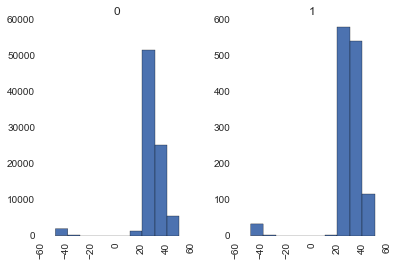

In [359]:
loan_train_processed.hist(column='age_when_applied', by='Disbursed');

### Model Building

In [360]:
loan_train_processed.columns

Index([u'Gender', u'City', u'Monthly_Income', u'DOB', u'Lead_Creation_Date',
       u'Loan_Amount_Applied', u'Loan_Tenure_Applied', u'Existing_EMI',
       u'Employer_Name', u'Salary_Account', u'Mobile_Verified', u'Var5',
       u'Var1', u'Loan_Amount_Submitted', u'Loan_Tenure_Submitted',
       u'Interest_Rate', u'Processing_Fee', u'EMI_Loan_Submitted',
       u'Filled_Form', u'Device_Type', u'Var2', u'Source', u'Var4',
       u'LoggedIn', u'Disbursed', u'age_delta', u'age_when_applied'],
      dtype='object')

In [361]:
features = loan_train_processed[['City', 'Salary_Account', 'Interest_Rate', 'Employer_Name', 'Monthly_Income', 
                                 'Loan_Amount_Applied', 'Loan_Tenure_Applied', 
                                 'Existing_EMI', 'Loan_Amount_Submitted', 'Loan_Tenure_Submitted',
                                 'Var1', 'Source', 'Var5','age_when_applied']]

## Clustering

In [363]:
from sklearn.cluster import KMeans

In [362]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(features.values)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [365]:
features.loc[:, 'labels'] = kmeans.labels_

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


## Cross Validation

In [366]:
from sklearn.cross_validation import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(loan_train.Disbursed, n_iter=3, test_size=0.3, random_state=121)

In [367]:
train_idx, test_idx = next(iter(sss))

In [368]:
Xt = features.iloc[train_idx]
Xv = features.iloc[test_idx]

yt = loan_train.Disbursed.iloc[train_idx]
yv = loan_train.Disbursed.iloc[test_idx]

### Randomized Trees

In [369]:
etr_entropy = ExtraTreesClassifier(n_estimators=100, criterion='entropy',
                                   max_depth=10, min_samples_split=5, class_weight='auto')
etr_entropy.fit(Xt, yt)

ExtraTreesClassifier(bootstrap=False, class_weight='auto',
           criterion='entropy', max_depth=10, max_features='auto',
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [370]:
yv_pred_etr_entropy = etr_entropy.predict_proba(Xv)[:, 1]
print 'ROC AUC score for randomized trees on test set %f ' %score(yv, yv_pred_etr_entropy)

ROC AUC score for randomized trees on test set 0.817161 


## Logistic Regression model

In [371]:
linear_model = logistic_regression(Xt, yt)

In [372]:
linear_model

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [373]:
yv_pred_linear = predictions(linear_model, Xv)[:, 1]
print 'ROC AUC score for linear model on test set %f ' %score(yv, yv_pred_linear)

ROC AUC score for linear model on test set 0.800302 


In [374]:
a = transform_for_ranked(yv_pred_etr_entropy, Xt.index.values)
b = transform_for_ranked(yv_pred_linear, Xt.index.values)

ranked_ranks = ranked_averaging([a, b])

In [375]:
r_preds = [k3 for k1, k2, k3 in ranked_ranks]

In [376]:
print 'ROC AUC score for ranked predictions on test set %f ' %score(yv, r_preds)

ROC AUC score for ranked predictions on test set 0.818227 


## Random Forest Classifier

In [377]:
# Random Forest Classifier
model_rf = random_forest_classifier(Xt, yt)

In [378]:
model_rf

RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [379]:
yv_pred_rf = predictions(model_rf, Xv)[:, 1]
print 'ROC AUC score on the test set for Random Forest Classifier %f ' %(score(yv, yv_pred_rf))

ROC AUC score on the test set for Random Forest Classifier 0.837109 


## Gradient Boosting Classifier

In [380]:
# Gradient Boosting Classifier
model = gradient_boosting_classifier(Xt, yt)

In [381]:
model

GradientBoostingClassifier(init=None, learning_rate=0.05, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [382]:
yv_pred_gbc = predictions(model, Xv)[:, 1]
print 'ROC AUC score on the test set for GBC %f ' %(score(yv, yv_pred_gbc))

ROC AUC score on the test set for GBC 0.846207 


## Ensembling RF and GBC predictions

In [383]:
pd.DataFrame({'rf_preds': yv_pred_rf, 'gbr_pred': yv_pred_gbc}).corr()

,gbr_pred,rf_preds
gbr_pred,1.000000,0.727276
rf_preds,0.727276,1.000000


In [387]:
rf_preds_transformed = transform_for_ranked(yv_pred_rf, Xt.index.values)
gbc_preds_transformed = transform_for_ranked(yv_pred_gbc, Xt.index.values)

ranked_ranks = ranked_averaging([rf_preds_transformed, gbc_preds_transformed])

In [388]:
ranked_ranks[:5]

[(0, 'ID002547Z20', 0.7318521356062057),
 (1, 'ID050788K30', 0.7984294196514078),
 (2, 'ID024101Z10', 0.1123539551809998),
 (3, 'ID002288A30', 0.7079486688373875),
 (4, 'ID033043X30', 0.31802336717104)]

In [389]:
yv_ranks_ensemble = [k3 for k1, k2, k3 in ranked_ranks]
print 'ROC AUC score for ensemble %f ' %(score(yv, yv_ranks_ensemble))

ROC AUC score for ensemble 0.845163 


### Final Model

In [390]:
features_test = loan_test[['City', 'Salary_Account', 'Interest_Rate', 'Employer_Name', 'Monthly_Income', 
                         'Loan_Amount_Applied', 'Loan_Tenure_Applied', 
                         'Existing_EMI', 'Loan_Amount_Submitted', 'Loan_Tenure_Submitted',
                         'Var1', 'Source', 'Var5','age_when_applied']]

In [391]:
features_test.loc[:, 'labels'] = kmeans.predict(features_test)

In [393]:
# model_final_rf = random_forest_classifier(features, loan_train_processed.Disbursed)
model_final_gbr = gradient_boosting_classifier(features, loan_train_processed.Disbursed)

In [394]:
# final_preds_rf = predictions(model_final_rf, features_test)[:, 1]
final_preds_gbc = predictions(model_final_gbr, features_test)[:, 1]

In [208]:
# final_preds_rf_trans = transform_for_ranked(final_preds_rf, loan_test_processed.index.values)
# final_preds_gbc_trans = transform_for_ranked(final_preds_gbc, loan_test_processed.index.values)

# test_ranked_ranks = ranked_averaging([final_preds_rf_trans, final_preds_gbc_trans])

In [395]:
create_submission_file(loan_test.index.values, final_preds_gbc, 'gbr_cluster.csv')

## Feature Selection

In [108]:
%run scripts/feature_selection.py

In [109]:
feature_selection(loan_train_processed[['City', 'Salary_Account', 'Employer_Name', 'Monthly_Income','Var5', 
                           'Loan_Amount_Applied', 'Loan_Tenure_Applied', 
                           'Existing_EMI', 'Loan_Amount_Submitted', 'Loan_Tenure_Submitted',
                           'Var1', 'Filled_Form', 'Device_Type', 'Var2', 'Source', 'Var5', 'age_when_applied']], 
                  loan_train_processed.Disbursed)

initial f1 score based on extra trees classifier:  0.0
feature importance:  [ 0.09203676  0.08384553  0.11182189  0.11072908  0.04303247  0.05550208
  0.03880343  0.08399025  0.0735262   0.03622075  0.04435319  0.01275061
  0.00250464  0.02240173  0.04466838  0.04152769  0.10228534]
sorted feature importances:  [ 0.11182189  0.11072908  0.10228534  0.09203676  0.08399025  0.08384553
  0.0735262   0.05550208  0.04466838  0.04435319  0.04303247  0.04152769
  0.03880343  0.03622075  0.02240173  0.01275061  0.00250464]
output format:
no of features, f1-score, roc-score of class-predictions, roc-score of probabilities
1 0.00481927710843 0.500686913274 0.564706467202
2 0.00497512437811 0.500939595594 0.809889017203
3 0.00502512562814 0.501017344 0.809101102236
4 0.01 0.502306807422 0.812684448935
5 0.0102301790281 0.502481741336 0.81692275472
6 0.00516795865633 0.501231152117 0.823756982092
7 0.0 0.499727880578 0.826796089947
8 0.0 0.499825066086 0.828271528778
9 0.0 0.49974731768 0.83190295